### Загружаем данные

In [14]:
import os
import shutil
from sklearn.datasets import load_files

In [15]:
files = os.listdir('messages')

### Подготавливаем данные

In [16]:
spam = "C:\\Users\Julko\Data analysis-2022\Lab5\messages_new\spam"
good = "C:\\Users\Julko\Data analysis-2022\Lab5\messages_new\good"
mes = "C:\\Users\Julko\Data analysis-2022\Lab5\messages"
for file in files:
    f = os.path.join(mes, file)
    if("legit" in file):    
        shutil.copy(f, good)
    elif ("spmsg" in file): 
        shutil.copy(f, spam)
    else:
        print("Error")


In [17]:
messages_data = load_files("C:\\Users\Julko\Data analysis-2022\Lab5\messages_new")

In [18]:
data = messages_data.data
target = messages_data.target

In [19]:
print(data[0])
print(target[0])

b'Subject: 2056 118 11457 118 16317 20215 68 11521 47 47 47 70\n\n284 4726 13406 20146 10741 1847 3249 1046 18957 2176 13872 15691 14497 24704 2176 18065 1692 23590 2008 5948 84 196 22213 16250 21990 2176 13522 1692 16537 10508 84 4726 118 13522 17345 4712 22299 17174 180 13408 1593 4167 5200 14338 11419 23205 3902 762 84 2130 766 84 93 84 131 11419 22213 22780 752 118 728 1991 5289 721 84 13522 17345 4712 14535 22299 1593 6592 1991 14686 2130 526 2130 130 4797 131 23266 24097 14913\n'
0


### Учитываем одинаково заголовок и тело сообщения

In [20]:
import re

In [21]:
def split_to_subject_body(fileString):
  fileString.startswith(b'Subject: ')

  subject, body = fileString.removeprefix(b'Subject:').split(b'\n\n', maxsplit=1)

  subject = subject.decode("utf-8").rstrip()
  body = body.decode("utf-8").rstrip()
  
  return subject, body

In [22]:
common_data = []
for idx in range(0, len(data)):
    subject, body = split_to_subject_body(data[idx])
    
    common_data.append(subject+body)


In [23]:
print(common_data[0])

 2056 118 11457 118 16317 20215 68 11521 47 47 47 70284 4726 13406 20146 10741 1847 3249 1046 18957 2176 13872 15691 14497 24704 2176 18065 1692 23590 2008 5948 84 196 22213 16250 21990 2176 13522 1692 16537 10508 84 4726 118 13522 17345 4712 22299 17174 180 13408 1593 4167 5200 14338 11419 23205 3902 762 84 2130 766 84 93 84 131 11419 22213 22780 752 118 728 1991 5289 721 84 13522 17345 4712 14535 22299 1593 6592 1991 14686 2130 526 2130 130 4797 131 23266 24097 14913


##### Признак для слова : сколько раз встретилось слово

In [24]:
from sklearn.feature_extraction.text import CountVectorizer
from scipy.sparse import csr_matrix

In [25]:
vectorizer = CountVectorizer()
X_1 = vectorizer.fit_transform(common_data).toarray()

##### Признак для слова : встретилось или нет

In [26]:
X_2 = X_1.astype(bool).astype(int)  

### Учитываем отдельно заголовок и тело сообщения

In [27]:
separate_data = []
for idx in range(0, len(data)):
    subject, body = split_to_subject_body(data[idx])
    
    separate_data.append(subject)
    separate_data.append(body)


In [28]:
print(separate_data[0])

 2056 118 11457 118 16317 20215 68 11521 47 47 47 70


##### Признак для слова : встретилось или нет

In [29]:
vectorizer = CountVectorizer()
X_3 = vectorizer.fit_transform(separate_data).toarray()

##### Признак для слова : сколько раз встретилось слово

In [30]:
X_4 = X_3.astype(bool).astype(int)  

### Наивный байесовский классификатор

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
import matplotlib.pyplot as plt

In [63]:
def baes(X_data, is_true):
    t = target
    if is_true:
        t = list(map(lambda x: [x, x], t))
        t = [x for l in t for x in l]
        
    X_train, X_test, Y_train, Y_test = train_test_split(X_data, t, test_size=0.2, random_state=0)
    model = MultinomialNB()
    model.fit(X_train, Y_train)
    y_pred = model.predict_proba(X_test)
    return Y_test, y_pred[:, 1]

In [64]:
def draw(y_test, y_pred):
    auc = metrics.roc_auc_score(y_test, y_pred)

    false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(y_test, y_pred)

    plt.figure(figsize=(10, 8))
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.plot(false_positive_rate, true_positive_rate, 'g')
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.fill_between(false_positive_rate, true_positive_rate, facecolor='lightyellow', alpha=0.7)
    plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
    plt.xlabel("False Positive")
    plt.ylabel("True Positive")
    plt.show()

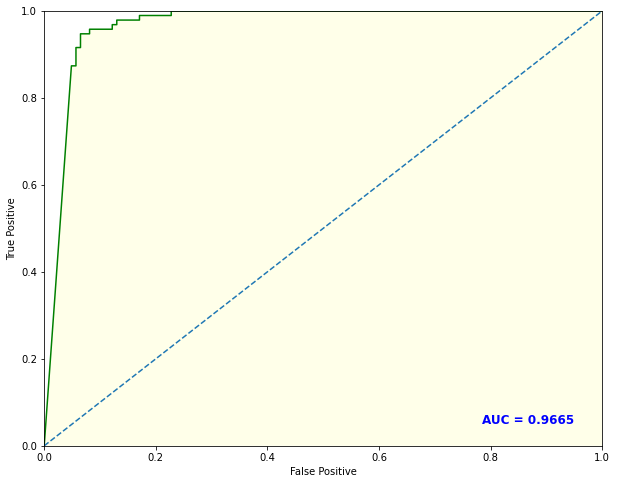

In [65]:
draw(baes(X_1, False)[0],  baes(X_1, False)[1])

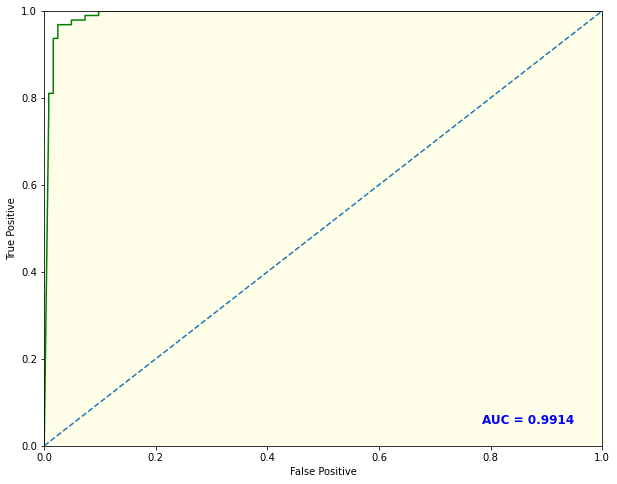

In [66]:
draw(baes(X_2, False)[0],  baes(X_2, False)[1])

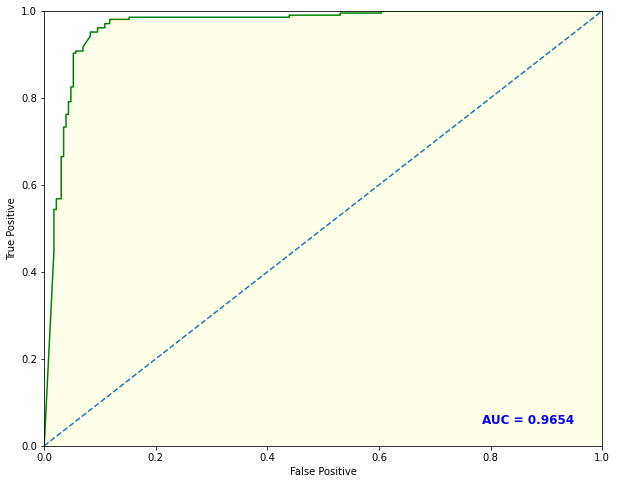

In [39]:
draw(baes(X_3, True)[0], baes(X_3, True)[1])

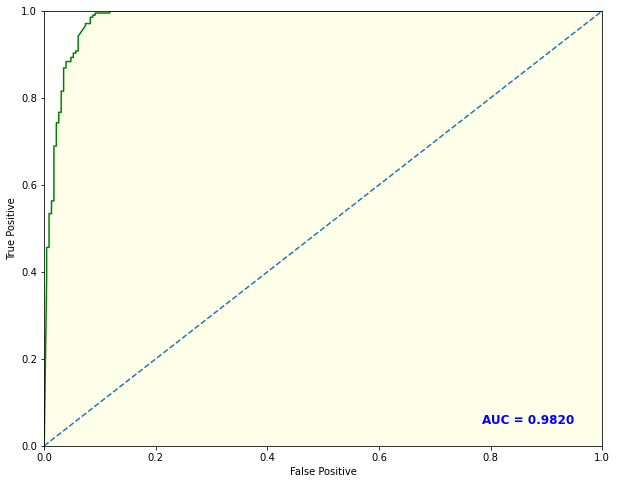

In [40]:
draw(baes(X_4, True)[0],  baes(X_4, True)[1])

### График зависимости точности классификации от изменения априорного распределения в логарифмированном пространстве.

In [41]:
import numpy as np

In [54]:
X_train, X_test, Y_train, Y_test = train_test_split(X_2, target, test_size=0.2, random_state=0)

In [56]:
def check_r(y_pred, auc, p):
    r = metrics.confusion_matrix(Y_test, y_pred)
    r = np.flip(r)

    if(r[0][1] == 0):
      print("r =", r, "\np = ", p, "auc =",  auc)

In [57]:
def calculate_auc(p):  
  model = MultinomialNB(class_prior=[p, 1 - p])
  model.fit(X_train, Y_train)
  y_pred = model.predict(X_test)

# по всем выборкам
  auc = metrics.roc_auc_score(Y_test, y_pred)
  check_r(y_pred, auc, p)

  return auc

In [60]:
ps = np.logspace(start=-1000, stop=-0.001, num=200, base=10)
aucs = list(map(calculate_auc, ps))

r = [[95  0]
 [90 33]] 
p =  4.189777447876891e-76 auc = 0.6341463414634146
r = [[95  0]
 [89 34]] 
p =  4.439269977694486e-71 auc = 0.6382113821138211
r = [[95  0]
 [86 37]] 
p =  4.70361926857262e-66 auc = 0.6504065040650406
r = [[95  0]
 [85 38]] 
p =  4.9837100097191775e-61 auc = 0.6544715447154472
r = [[95  0]
 [83 40]] 
p =  5.280479571748773e-56 auc = 0.6626016260162602
r = [[95  0]
 [79 44]] 
p =  5.594921143740461e-51 auc = 0.6788617886178862
r = [[95  0]
 [73 50]] 
p =  5.928087057122236e-46 auc = 0.7032520325203252
r = [[95  0]
 [67 56]] 
p =  6.281092307463118e-41 auc = 0.7276422764227642
r = [[95  0]
 [61 62]] 
p =  6.655118286004822e-36 auc = 0.7520325203252033
r = [[95  0]
 [56 67]] 
p =  7.051416733374573e-31 auc = 0.7723577235772358
r = [[95  0]
 [50 73]] 
p =  7.47131392874929e-26 auc = 0.7967479674796748
r = [[95  0]
 [47 76]] 
p =  7.916215128477297e-21 auc = 0.8089430894308943
r = [[95  0]
 [39 84]] 
p =  8.387609268990642e-16 auc = 0.8414634146341463
r = [[95  0]


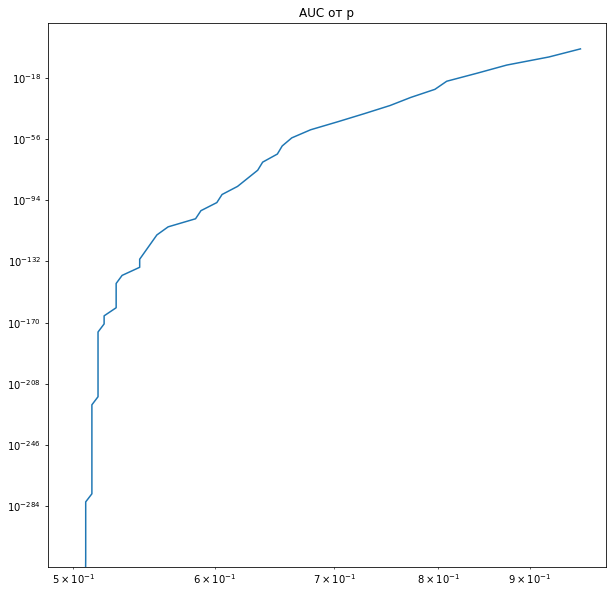

In [61]:
plt.figure(figsize=(10, 10))
plt.title('AUC от p')
plt.plot(aucs, ps)
plt.xscale('log')
plt.yscale('log')
plt.show()